In [14]:
#BINARY_CLASSIFICATION

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('/content/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


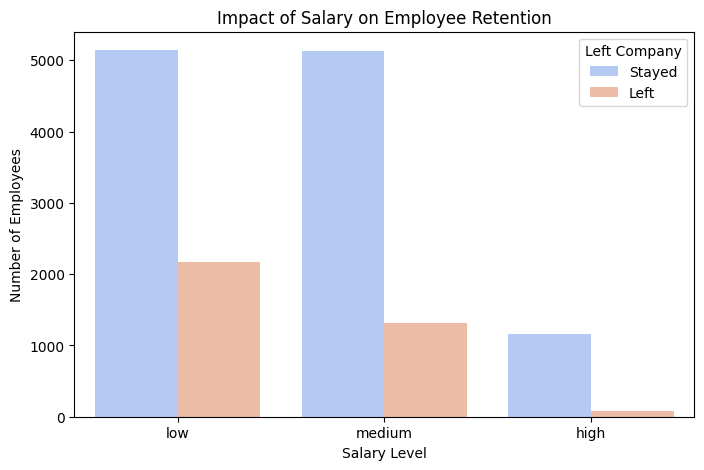

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="salary", hue="left", palette="coolwarm")
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.legend(title="Left Company", labels=["Stayed", "Left"])
plt.show()

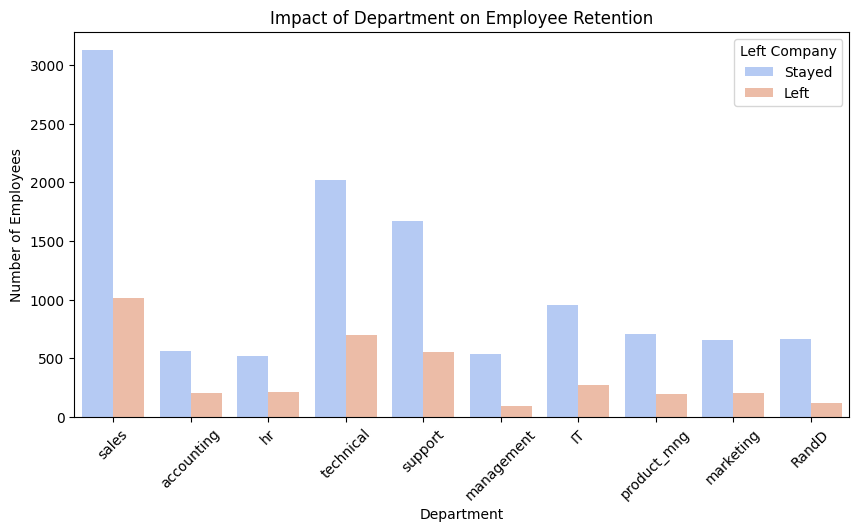

In [6]:
# Bar chart - Impact of department on retention
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Department", hue="left", palette="coolwarm")
plt.title("Impact of Department on Employee Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.legend(title="Left Company", labels=["Stayed", "Left"])
plt.show()


In [7]:
# Feature selection
features = ["satisfaction_level", "number_project", "time_spend_company", "promotion_last_5years", "salary"]
target = "left"

In [8]:
# Encode categorical variable (Salary)
df_encoded = df.copy()
df_encoded["salary"] = LabelEncoder().fit_transform(df["salary"])

In [9]:
# Train-test split
X = df_encoded[features]
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

In [12]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [13]:
print(f"Model Accuracy: {accuracy:.2%}\n")
print("Classification Report:\n", report)

Model Accuracy: 74.67%

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.85      2294
           1       0.43      0.24      0.30       706

    accuracy                           0.75      3000
   macro avg       0.61      0.57      0.57      3000
weighted avg       0.71      0.75      0.72      3000



In [15]:
#MULTICLASS_CLASSIFICATION

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
zoo_data_path = "/content/zoo-data.csv"
class_type_path = "/content/zoo-class-type.csv"

zoo_df = pd.read_csv(zoo_data_path)
class_type_df = pd.read_csv(class_type_path)
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [29]:
# Drop 'animal_name' as it's not useful for prediction
zoo_df = zoo_df.drop(columns=["animal_name"])

In [32]:
# Define features and target variable
X = zoo_df.drop(columns=["class_type"])
y = zoo_df["class_type"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Train logistic regression model
model = LogisticRegression(max_iter=200, multi_class="multinomial", solver="lbfgs")
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [35]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [36]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}\n")

Model Accuracy: 95.24%



<Figure size 800x600 with 0 Axes>

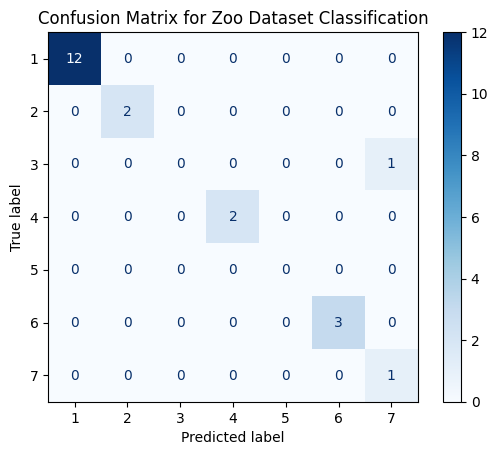

In [38]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=sorted(y.unique())) # Ensure all labels are included
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sorted(y.unique()))
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Zoo Dataset Classification")
plt.show()